In [1]:
import sys  
#sys.executable} -m pip install pandas
import pandas as pd
import numpy as np

#!{sys.executable} -m pip install geopandas
import geopandas as gpd

import requests

import warnings
warnings.filterwarnings('ignore')

#!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

#!{sys.executable} -m pip install folium
import folium
#!{sys.executable} -m pip install geopy

import geopy.distance
import glob

In [2]:
# loading all the county files
file_list = glob.glob('processed_data/selected_*_final.csv')
file_list

['processed_data/selected_nj_bg_data_final.csv',
 'processed_data/selected_LA_bg_data_final.csv',
 'processed_data/selected_HUSTON_bg_data_final.csv',
 'processed_data/selected_ny_bg_data_final.csv']

In [3]:
# selecting only few for testing
f_list_2 = ['processed_data/selected_nj_bg_data_final.csv',
 'processed_data/selected_ny_bg_data_final.csv']

In [9]:
df_list = []
for file in file_list:
    tp_df=pd.read_csv(file)
    df_list.append(tp_df)

In [10]:
# appending loaded dataframes
df=pd.concat(df_list)

In [11]:
df.COUNTY.unique()

array(['Bergen County', 'Essex County', 'Hudson County',
       'Middlesex County', 'Morris County', 'Union County',
       'Los Angeles County', 'Harris County', 'Bronx County',
       'Kings County', 'New York County', 'Queens County',
       'Richmond County'], dtype=object)

In [12]:
df.shape

(1835, 53)

### Merging Race Data

In [13]:
# adding the race information
df_race=pd.read_csv('processed_data/selected_states_race_data.csv')

In [14]:
df_race.shape

(98220, 4)

In [15]:
df=df.merge(df_race,on='GISJOIN',how='left')

In [16]:
df.shape

(1835, 56)

In [17]:
cords=df[['lat','lon']].values.tolist()

In [23]:
df.STATE.unique()

array(['New Jersey', 'California', 'Texas', 'New York'], dtype=object)

In [20]:
m = folium.Map(location=cords[0],zoom_control=3)

for point in cords:
    folium.Circle(
        radius=10,
        location=point,
        popup=str(point),#"The Waterfront",
        color="crimson",
        fill=False,).add_to(m)


m

### Analysing per County

In [24]:
res_analysis_cols =['Total_Population', 'Total_Working','Worked from home','Chinese Restaurant_count', 'Indian Restaurant_count', 'Italian Restaurant_count','Mexican Restaurant_count']


In [25]:
df.rename(columns={'income_group_<$10k':'income_group_<10k',
       'income_group_$10k_to_$25k':'income_group_10k_to_25k',
    'income_group_$25k_to_$50k':  'income_group_25k_to_50k',
       'income_group_$50k_to_$100k':'income_group_50k_to_100k',
    'income_group_$100k_to_$200k':'income_group_100k_to_200k',
                         'income_group_>$200k':'income_group_>200k'
},inplace=True)

In [26]:
income_groups= ['income_group_<10k',
       'income_group_10k_to_25k', 'income_group_25k_to_50k',
       'income_group_50k_to_100k', 'income_group_100k_to_200k',
       'income_group_>200k']

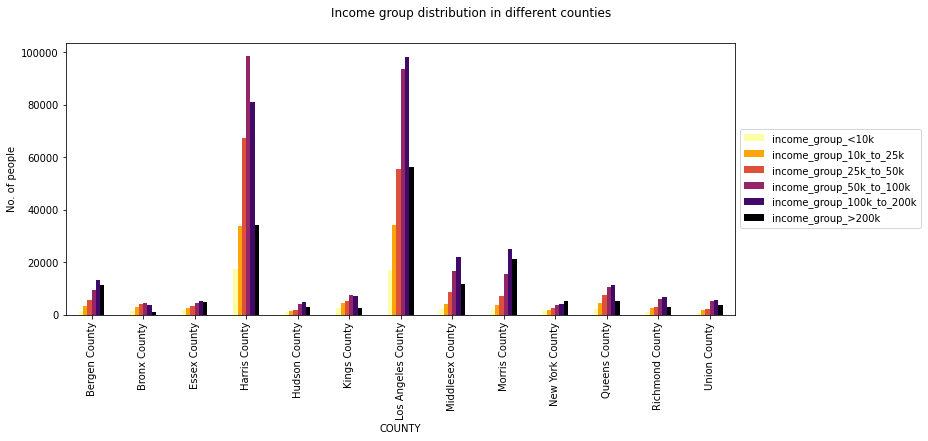

In [27]:
#  TODO : changes the inferno range
ax=df.groupby(['COUNTY'])[income_groups].sum().plot(kind='bar',figsize=(15,5),cmap='inferno_r')#.unstack(-1)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Income group distribution in different counties')
plt.ylabel('No. of people')
plt.show()

In [28]:
p1 = df.groupby(['COUNTY'])[res_analysis_cols].sum()

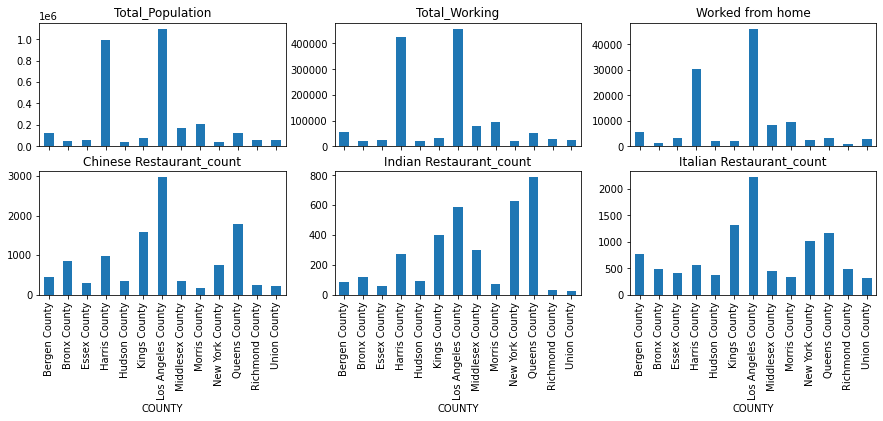

In [29]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,5),sharex=True)
cols=p1.columns.tolist()
k=0
for i in range(2):
    for j in range(3):
        p1[cols[k]].plot(kind='bar',ax=axes[i][j])
        axes[i][j].set_title(cols[k])
        k=k+1
plt.show()

In [30]:
df.shape

(1835, 56)

In [31]:
df.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
0  G34000300021001  New Jersey      34  Bergen County        3    2100   
1  G34000300021002  New Jersey      34  Bergen County        3    2100   
2  G34000300022001  New Jersey      34  Bergen County        3    2200   
3  G34000300023002  New Jersey      34  Bergen County        3    2300   
4  G34000300031001  New Jersey      34  Bergen County        3    3100   

   BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
0          1                  119                        127   
1          2                   84                         73   
2          1                  372                        260   
3          2                  226                         84   
4          1                  274                        188   

   travel_time_>60_mins  ...  Public Transportation_count  Rail Station_count  \
0                    58  ...                          1.0                 NaN   
1                    70  ...                          NaN                 NaN   
2                   216  ...                          1.0                 NaN   
3                   194  ...                          1.0                 NaN   
4                    75  ...                          1.0                 NaN   

   Bus Stop_avg_distance  Metro Station_avg_distance  \
0                    NaN                         NaN   
1                    NaN                         NaN   
2                    NaN                         NaN   
3                    NaN                         NaN   
4                 1532.4                         NaN   

   Public Transportation_avg_distance  Rail Station_avg_distance  \
0                              1511.0                        NaN   
1                                 NaN                        NaN   
2                              1866.0                        NaN   
3                              1484.0                        NaN   
4                              1633.0                        NaN   

   Business_Parks_Count  Total_Population_Race  White alone  Asian alone  
0                   2.0                    804          523          243  
1                   2.0                    655          370          230  
2                  10.0                   1708          925          760  
3                   8.0                   1597          779          768  
4                  16.0                   1117          766          329  

[5 rows x 56 columns]

In [32]:
df = df.fillna(0)

In [33]:
df.isna().sum().sum()

0

In [34]:
df['Indo-Chinese Restaurants Count'] = df['Chinese Restaurant_count'] + df['Indian Restaurant_count']

In [35]:
debug_cols =  ['GISJOIN', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA','BLCK_GRPA','INTPTLAT','INTPTLON', 'geometry', 'lat', 'lon']

time_for_travel_cols = ['travel_time_<30mins', 'travel_time_30_to_60_mins','travel_time_>60_mins']
income_group_cols = ['income_group_<10k', 'income_group_10k_to_25k','income_group_25k_to_50k', 'income_group_50k_to_100k','income_group_100k_to_200k', 'income_group_>200k']
total_population_col = ['Total_Population', 'White alone', 'Asian alone']
mode_of_commute_col = ['Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home']
work_force_cols =[
       'In labor force', 'In labor force: Civilian labor force',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'In labor force: Armed Forces', 'Not in labor force']

restaurent_cols = [ 'Chinese Restaurant_count',
       'Indian Restaurant_count', 'Italian Restaurant_count',
       'Mexican Restaurant_count', 'Chinese Restaurant_avg_distance',
       'Indian Restaurant_avg_distance', 'Italian Restaurant_avg_distance',
       'Mexican Restaurant_avg_distance']
transport_fs_cols =[ 'Bus Stop_count',
       'Metro Station_count', 'Public Transportation_count',
       'Rail Station_count', 'Bus Stop_avg_distance',
       'Metro Station_avg_distance', 'Public Transportation_avg_distance',
       'Rail Station_avg_distance']
business_park_cols =['Business_Parks_Count']
selected_cols = total_population_col + time_for_travel_cols+income_group_cols+mode_of_commute_col+work_force_cols+transport_fs_cols

selected_cols = total_population_col #+ income_group_cols+mode_of_commute_col+work_force_cols+transport_fs_cols

target=['Indo-Chinese Restaurants Count']


model_cols =selected_cols+target



In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans


In [40]:
df_model = df.copy()#[df.COUNTY=='Kings County'].copy()

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(df_model[model_cols])

In [42]:
X.shape

(1835, 4)

In [44]:
aug_indices = np.random.randint(X.shape[0], size=100000)

In [45]:
X_aug = X[aug_indices]

In [46]:
X_final = np.vstack([X,X_aug])

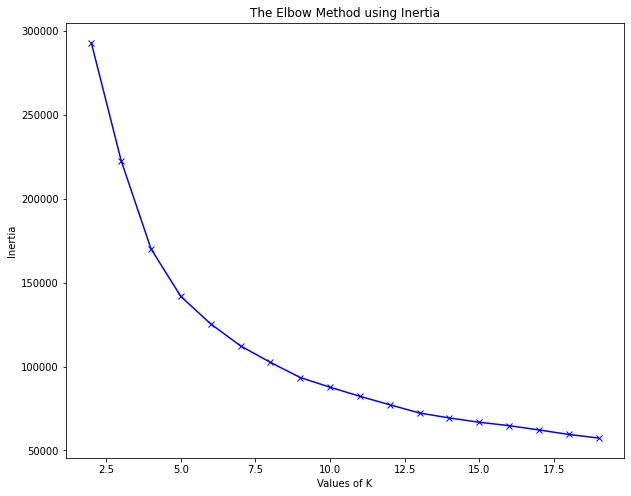

In [47]:
# find 'k' value by Elbow Method
plt.figure(figsize=[10, 8])
inertia=[]
range_val=range(2,20)
for i in range_val:
    kmean=KMeans(n_clusters=i)
    kmean.fit_predict(X_final)
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [64]:
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)
#kmeans = DBSCAN(min_samples=5,eps=0.25).fit(X)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 1, 1, 3, 3, 3, 2, 3, 3], dtype=int32)

In [65]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [66]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

In [67]:
kmeans.labels_.shape

(1835,)

In [68]:
df_model['cluster']  = kmeans.labels_

In [69]:
lat=df_model['lat']
lon=df_model['lon']
geoid=df_model['GISJOIN']
cluster = df_model['cluster']

In [70]:
map_clusters = folium.Map(location=cords[0], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lat,lon,geoid,cluster):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

<AxesSubplot:>

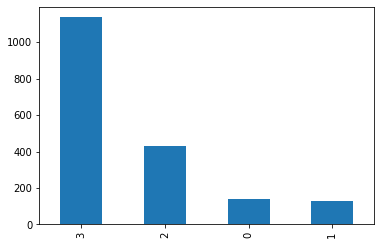

In [71]:
df_model.cluster.value_counts().plot(kind='bar')

In [72]:
df_model.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
0  G34000300021001  New Jersey      34  Bergen County        3    2100   
1  G34000300021002  New Jersey      34  Bergen County        3    2100   
2  G34000300022001  New Jersey      34  Bergen County        3    2200   
3  G34000300023002  New Jersey      34  Bergen County        3    2300   
4  G34000300031001  New Jersey      34  Bergen County        3    3100   

   BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
0          1                  119                        127   
1          2                   84                         73   
2          1                  372                        260   
3          2                  226                         84   
4          1                  274                        188   

   travel_time_>60_mins  ...  Bus Stop_avg_distance  \
0                    58  ...                    0.0   
1                    70  ...                    0.0   
2                   216  ...                    0.0   
3                   194  ...                    0.0   
4                    75  ...                 1532.4   

   Metro Station_avg_distance  Public Transportation_avg_distance  \
0                         0.0                              1511.0   
1                         0.0                                 0.0   
2                         0.0                              1866.0   
3                         0.0                              1484.0   
4                         0.0                              1633.0   

   Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
0                        0.0                   2.0                    804   
1                        0.0                   2.0                    655   
2                        0.0                  10.0                   1708   
3                        0.0                   8.0                   1597   
4                        0.0                  16.0                   1117   

   White alone  Asian alone  Indo-Chinese Restaurants Count  cluster  
0          523          243                             0.0        3  
1          370          230                             0.0        3  
2          925          760                             4.0        1  
3          779          768                             1.0        1  
4          766          329                            16.0        3  

[5 rows x 58 columns]

In [73]:
target

['Indo-Chinese Restaurants Count']

In [74]:
df.columns

Index(['GISJOIN', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA',
       'BLCK_GRPA', 'travel_time_<30mins', 'travel_time_30_to_60_mins',
       'travel_time_>60_mins', 'income_group_<10k', 'income_group_10k_to_25k',
       'income_group_25k_to_50k', 'income_group_50k_to_100k',
       'income_group_100k_to_200k', 'income_group_>200k', 'Total_Population',
       'Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home',
       'In labor force', 'In labor force: Civilian labor force',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'In labor force: Armed Forces', 'Not in labor force', 'INTPTLAT',
       'INTPTLON', 'geometry', 'lat', 'lon', 'Chinese Restaurant_count',
       'Indian Restaurant_count', 'Italian Restaurant_count',
       'Mexican Restaurant_count', 'Chinese Restaurant_avg_distance',
       'Indian Restaurant_avg_dista

In [75]:
d1 = df_model.groupby(['cluster']).agg({'GISJOIN':'count','Total_Population':'sum','Asian alone':'sum','Indo-Chinese Restaurants Count':'sum'})



In [76]:
d1['avg']=d1['Indo-Chinese Restaurants Count']*100/d1['Total_Population']
d1['avg_per_asian']=d1['Indo-Chinese Restaurants Count']*100/d1['Asian alone']

In [77]:
d1

GISJOIN  Total_Population  Asian alone  \
cluster                                           
0            142            185839        31510   
1            129            279040       138778   
2            428           1161088        90379   
3           1136           1472763       124170   

         Indo-Chinese Restaurants Count       avg  avg_per_asian  
cluster                                                           
0                                6485.0  3.489580      20.580768  
1                                1260.0  0.451548       0.907925  
2                                 977.0  0.084145       1.081003  
3                                5690.0  0.386349       4.582427

In [78]:
cmap='inferno_r'

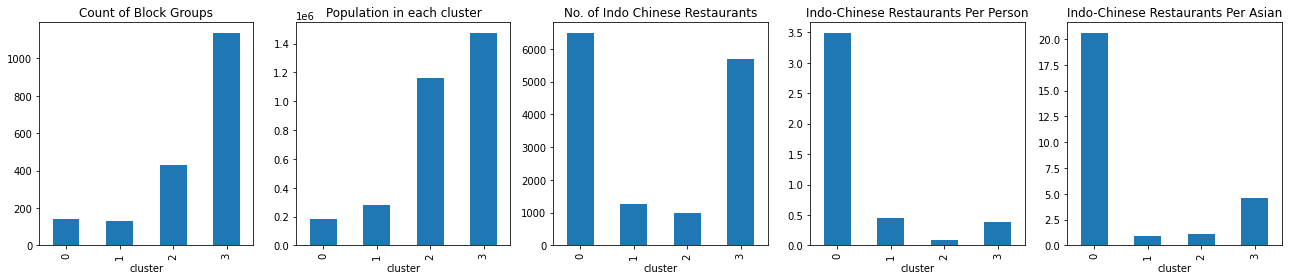

In [79]:
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(18,4))
d1['GISJOIN'].plot(kind='bar',ax=axes[0])
axes[0].set_title('Count of Block Groups')
d1['Total_Population'].plot(kind='bar',ax=axes[1])
axes[1].set_title('Population in each cluster')
d1['Indo-Chinese Restaurants Count'].plot(kind='bar',ax=axes[2])
axes[2].set_title('No. of Indo Chinese Restaurants')
d1['avg'].plot(kind='bar',ax=axes[3])
axes[3].set_title('Indo-Chinese Restaurants Per Person')
d1['avg_per_asian'].plot(kind='bar',ax=axes[4])
axes[4].set_title('Indo-Chinese Restaurants Per Asian')
plt.tight_layout()
plt.show()

In [80]:
df_model.shape

(1835, 58)

In [81]:
#select the cluster
df_model[df_model.cluster==1]

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
2     G34000300022001  New Jersey      34  Bergen County        3    2200   
3     G34000300023002  New Jersey      34  Bergen County        3    2300   
11    G34000300070011  New Jersey      34  Bergen County        3    7001   
19    G34000300130024  New Jersey      34  Bergen County        3   13002   
24    G34000300154021  New Jersey      34  Bergen County        3   15402   
...               ...         ...     ...            ...      ...     ...   
1788  G36008101223001    New York      36  Queens County       81  122300   
1789  G36008101347021    New York      36  Queens County       81  134702   
1790  G36008101367003    New York      36  Queens County       81  136700   
1793  G36008101529011    New York      36  Queens County       81  152901   
1795  G36008101551041    New York      36  Queens County       81  155104   

      BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
2             1                  372                        260   
3             2                  226                         84   
11            1                  456                        378   
19            4                  296                        272   
24            1                  823                        234   
...         ...                  ...                        ...   
1788          1                  380                        298   
1789          1                  408                        462   
1790          3                   94                        111   
1793          1                  151                        132   
1795          1                  252                        224   

      travel_time_>60_mins  ...  Bus Stop_avg_distance  \
2                      216  ...               0.000000   
3                      194  ...               0.000000   
11                     261  ...               0.000000   
19                     313  ...            1372.000000   
24                     126  ...            1742.000000   
...                    ...  ...                    ...   
1788                   216  ...             966.000000   
1789                   405  ...            1235.000000   
1790                   300  ...            1412.666667   
1793                   194  ...            1544.000000   
1795                   198  ...            1281.000000   

      Metro Station_avg_distance  Public Transportation_avg_distance  \
2                            0.0                              1866.0   
3                            0.0                              1484.0   
11                           0.0                                 0.0   
19                           0.0                              1944.0   
24                           0.0                              1814.0   
...                          ...                                 ...   
1788                         0.0                                 0.0   
1789                         0.0                                 0.0   
1790                         0.0                                 0.0   
1793                         0.0                                 0.0   
1795                         0.0                              1310.5   

      Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
2                           0.0                  10.0                   1708   
3                           0.0                   8.0                   1597   
11                       1289.0                   7.0                   2096   
19                          0.0                  62.0                   1854   
24                          0.0                  31.0                   1957   
...                         ...                   ...                    ...   
1788                     1180.0                  20.0                   1762   
1789                      699.0                  17.0                   2504   
17

In [235]:
selected_cluster_points = df_model[df_model.cluster==0][['lat','lon']].values.tolist()

In [236]:
m = folium.Map(location=selected_cluster_points[0])

for point in selected_cluster_points:
    folium.Circle(
        radius=100,
        location=point,
        popup=str(point),#"The Waterfront",
        color="crimson",
        fill=False,).add_to(m)

    folium.CircleMarker(
        location=point,
        radius=10,
        popup=str(point),#"Laurelhurst Park",
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",).add_to(m)


m

In [237]:
df_model.head()

GISJOIN     STATE  STATEA        COUNTY  COUNTYA  TRACTA  \
473  G36004700002001  New York      36  Kings County       47     200   
474  G36004700022003  New York      36  Kings County       47    2200   
475  G36004700029012  New York      36  Kings County       47    2901   
476  G36004700044001  New York      36  Kings County       47    4400   
477  G36004700045003  New York      36  Kings County       47    4500   

     BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
473          1                  148                        283   
474          3                   61                        292   
475          2                  103                        143   
476          1                  261                        169   
477          3                  144                        246   

     travel_time_>60_mins  ...  Bus Stop_avg_distance  \
473                    78  ...            1126.750000   
474                   104  ...            1270.571429   
475                    63  ...            1259.800000   
476                   157  ...            1342.300000   
477                    13  ...             998.909091   

     Metro Station_avg_distance  Public Transportation_avg_distance  \
473                 1384.875000                          602.000000   
474                  991.500000                         1215.500000   
475                 1443.888889                         1150.478261   
476                 1354.000000                         1417.500000   
477                 1422.222222                         1163.666667   

     Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
473                 974.000000                  68.0                    992   
474                 859.600000                  63.0                    940   
475                1391.230769                 182.0                   1045   
476                1636.000000                  25.0                   1301   
477                1197.400000                 171.0                    747   

     White alone  Asian alone  Indo-Chinese Restaurants Count  cluster  
473          446           46                            29.0        2  
474          535          103                            33.0        2  
475          148           25                            62.0        5  
476         1200           81                            23.0        1  
477          535          103                            54.0        5  

[5 rows x 58 columns]

In [238]:
four_square_cols = restaurent_cols + transport_fs_cols + business_park_cols 

In [253]:
df_result = df_model[['GISJOIN']+total_population_col+income_group_cols+four_square_cols+target][df_model.cluster==0]

In [254]:
df_result.head()

GISJOIN  Total_Population  White alone  Asian alone  \
493  G36004700271001              1724          363          261   
494  G36004700289001               899          217            0   
496  G36004700301001               991          358           66   
503  G36004700409001              1305          363           24   
505  G36004700441002              1337          620          118   

     income_group_<10k  income_group_10k_to_25k  income_group_25k_to_50k  \
493                107                       88                       99   
494                 11                      124                       18   
496                 19                       43                       69   
503                 22                      106                       65   
505                 23                       58                      190   

     income_group_50k_to_100k  income_group_100k_to_200k  income_group_>200k  \
493                       104                        137                  84   
494                       100                         72                   8   
496                        68                        146                  53   
503                       273                         44                  13   
505                       148                         93                   0   

     ...  Bus Stop_count  Metro Station_count  Public Transportation_count  \
493  ...            13.0                  9.0                          8.0   
494  ...             8.0                 10.0                          9.0   
496  ...            12.0                 11.0                         16.0   
503  ...             9.0                 11.0                         10.0   
505  ...             6.0                  9.0                         10.0   

     Rail Station_count  Bus Stop_avg_distance  Metro Station_avg_distance  \
493                10.0            1200.692308                 1553.333333   
494                 9.0            1353.125000                 1287.700000   
496                11.0            1267.833333                 1225.909091   
503                 8.0            1495.888889                 1435.000000   
505                 4.0            1179.333333                 1137.222222   

     Public Transportation_avg_distance  Rail Station_avg_distance  \
493                         1121.625000                 989.800000   
494                         1494.666667                1454.222222   
496                         1244.437500                1460.272727   
503                         1288.100000                1429.000000   
505                         1354.100000                1331.000000   

     Business_Parks_Count  Indo-Chinese Restaurants Count  
493                  72.0                            52.0  
494                  97.0                            44.0  
496                  50.0                            39.0  
503                  42.0                            42.0  
505                  78.0                            42.0  

[5 rows x 28 columns]

In [255]:
df_result['restaurant_per_person']=df_result['Indo-Chinese Restaurants Count']/df_result['Total_Population']
df_result['restaurant_per_asian']=df_result['Indo-Chinese Restaurants Count']/df_result['Asian alone']

In [256]:
mode_of_commute_col = ['Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home']

In [257]:
df_result = df_result.merge(df_model[debug_cols+mode_of_commute_col],on='GISJOIN',how='left')

In [258]:
df_result['identifier']=df_result['COUNTY']+'_T'+df_result['TRACTA'].apply(str)+'_BG'+df_result['BLCK_GRPA'].apply(str)



In [259]:
import seaborn

In [260]:
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

In [263]:
df_result.columns

Index(['GISJOIN', 'Total_Population', 'White alone', 'Asian alone',
       'income_group_<10k', 'income_group_10k_to_25k',
       'income_group_25k_to_50k', 'income_group_50k_to_100k',
       'income_group_100k_to_200k', 'income_group_>200k',
       'Chinese Restaurant_count', 'Indian Restaurant_count',
       'Italian Restaurant_count', 'Mexican Restaurant_count',
       'Chinese Restaurant_avg_distance', 'Indian Restaurant_avg_distance',
       'Italian Restaurant_avg_distance', 'Mexican Restaurant_avg_distance',
       'Bus Stop_count', 'Metro Station_count', 'Public Transportation_count',
       'Rail Station_count', 'Bus Stop_avg_distance',
       'Metro Station_avg_distance', 'Public Transportation_avg_distance',
       'Rail Station_avg_distance', 'Business_Parks_Count',
       'Indo-Chinese Restaurants Count', 'restaurant_per_person',
       'restaurant_per_asian', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA',
       'TRACTA', 'BLCK_GRPA', 'INTPTLAT', 'INTPTLON', 'geometry', 'lat', '

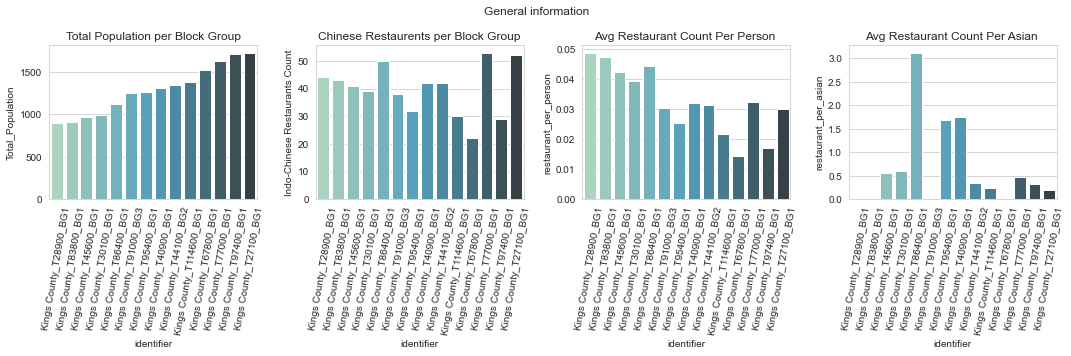

In [265]:
fig,axes= plt.subplots(nrows=1,ncols=4,figsize=(15,5))
sns.barplot(x='identifier',y='Total_Population',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[0])
sns.barplot(x='identifier',y='Indo-Chinese Restaurants Count',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[1])
sns.barplot(x='identifier',y='restaurant_per_person',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[2])
sns.barplot(x='identifier',y='restaurant_per_asian',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[3])

#axes[0].set_xlabel('Total_Population')
#axes[1].set_xlabel('Chinese Restaurant_count')
#axes[2].set_xlabel('Avg Restaurant Count Per Person ')
axes[0].set_title('Total Population per Block Group')
axes[1].set_title('Chinese Restaurents per Block Group')
axes[2].set_title('Avg Restaurant Count Per Person ')
axes[3].set_title('Avg Restaurant Count Per Asian ')
axes[0].tick_params(axis='x', rotation=80)
axes[1].tick_params(axis='x', rotation=80)
axes[2].tick_params(axis='x', rotation=80)
axes[3].tick_params(axis='x', rotation=80)
plt.suptitle('General information')
plt.tight_layout()
plt.show()

In [266]:
#fig,axes= plt.subplots(nrows=2,ncols=4,figsize=(15,8),sharex=True)
#k=0
#for i in range(2):
#    for j in range(4):
#        sns.barplot(x='identifier',y=transport_fs_cols[k],data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[i][j])
#        axes[i][j].set_title(transport_fs_cols[k])
#        axes[i][j].tick_params(axis='x', rotation=80)
#        k=k+1
#plt.suptitle('Transport Information per Block Group')
#plt.tight_layout()
#plt.show()    

In [269]:
mode_of_commute_col2 = [i.replace(',','').replace(' ','_') for i in mode_of_commute_col]
md={i:j for i,j in zip(mode_of_commute_col,mode_of_commute_col2)}
df_result = df_result.rename(columns=md)
mode_of_commute_col2

['Total_Working',
 'Car_truck_or_van',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other_means_of_transport',
 'Worked_from_home']

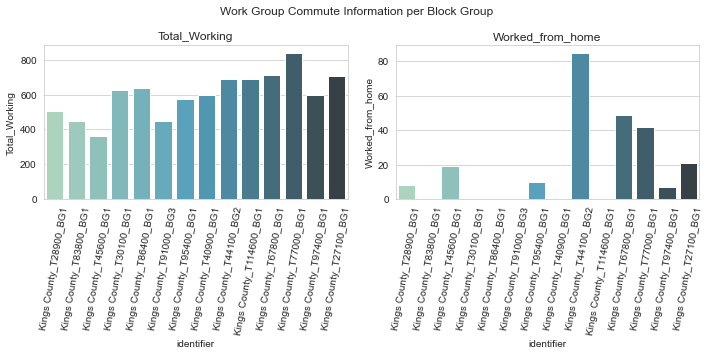

In [273]:
fig,axes= plt.subplots(nrows=1,ncols=2,figsize=(10,5),sharex=True)
sns.barplot(x='identifier',y='Total_Working',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[0])
sns.barplot(x='identifier',y='Worked_from_home',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[1])

axes[0].set_title('Total_Working')
axes[1].set_title('Worked_from_home')
axes[0].tick_params(axis='x', rotation=80)
axes[1].tick_params(axis='x', rotation=80)
plt.suptitle('Work Group Commute Information per Block Group')
plt.tight_layout()
plt.show()    

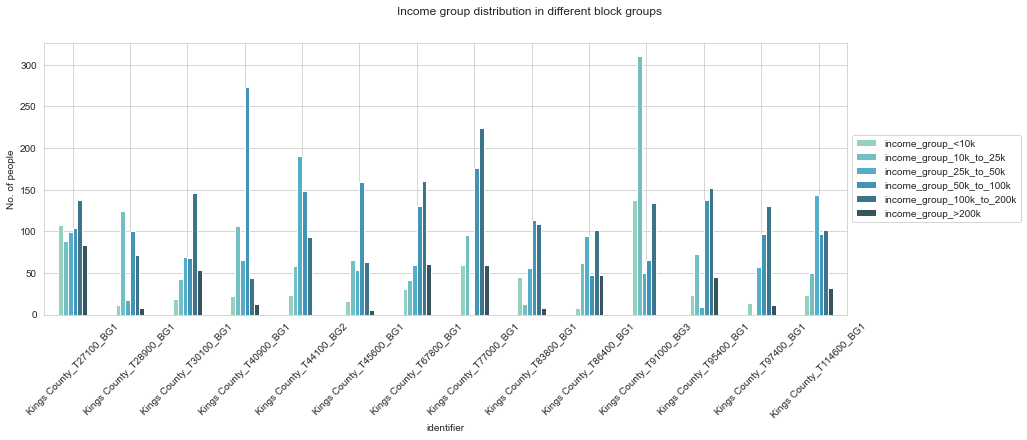

In [274]:
ax = df_result[['identifier']+income_group_cols].set_index('identifier').plot(kind='bar',figsize=(18,5))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Income group distribution in different block groups')
plt.ylabel('No. of people')
plt.xticks(rotation=45)
plt.show()

### Scoring the Block Groups

In [486]:
score_df = df_result[['identifier','restaurant_per_person','restaurant_per_asian','Total_Working','income_group_100k_to_200k']]
score_df['restaurant_per_asian'] = score_df['restaurant_per_asian'].replace(np.inf,0)#*100
scale_cols=score_df.columns[1:]
score_df

identifier  restaurant_per_person  restaurant_per_asian  \
0    Kings County_T27100_BG1               0.030162              0.199234   
1    Kings County_T28900_BG1               0.048943              0.000000   
2    Kings County_T30100_BG1               0.039354              0.590909   
3    Kings County_T40900_BG1               0.032184              1.750000   
4    Kings County_T44100_BG2               0.031414              0.355932   
5    Kings County_T45600_BG1               0.042443              0.554054   
6    Kings County_T67800_BG1               0.014483              0.000000   
7    Kings County_T77000_BG1               0.032575              0.473214   
8    Kings County_T83800_BG1               0.047566              0.000000   
9    Kings County_T86400_BG1               0.044524              3.125000   
10   Kings County_T91000_BG3               0.030498              0.000000   
11   Kings County_T95400_BG1               0.025397              1.684211   
12   Kings County_T97400_BG1               0.016989              0.315217   
13  Kings County_T114600_BG1               0.021692              0.240000   

    Total_Working  income_group_100k_to_200k  
0             705                        137  
1             504                         72  
2             625                        146  
3             597                         44  
4             689                         93  
5             360                         63  
6             713                        161  
7             841                        224  
8             451                        109  
9             636                        101  
10            451                        134  
11            574                        152  
12            600                        130  
13            687                        101

In [487]:
score_normal=score_df.copy()

In [488]:
def scaleColumn(data):
    '''
    normalizing the columns for scoring
    '''
    row_list = data.values.tolist()
    row_min,row_max = min(row_list),max(row_list)
    op=[]
    for i,val in enumerate(row_list):
        op.append((val-row_min)/(row_max-row_min))
    return op

def getScore(data,weights):
    '''
    scoring the rows with weights
    '''
    score = 0
    for key,value in weights.items():
        score = score + data[key]*value
    return score

In [489]:
# normalizing the columns
for col in scale_cols:
    print(col)
    score_df[col]=scaleColumn(score_df[col])

restaurant_per_person
restaurant_per_asian
Total_Working
income_group_100k_to_200k


In [490]:
# reversing the numbers as we need restaurent locations with lower PerPerson restaurant
score_df['restaurant_per_person']=1-score_df['restaurant_per_person']
score_df['restaurant_per_asian']=1-score_df['restaurant_per_asian']

In [491]:

w_dict= {'restaurant_per_asian': 50,
 'restaurant_per_person': 20,
 'Total_Working': 10,
 'income_group_100k_to_200k': 20}
w_dict


{'restaurant_per_asian': 50,
 'restaurant_per_person': 20,
 'Total_Working': 10,
 'income_group_100k_to_200k': 20}

In [492]:
score_df['score']=score_df.apply(getScore,weights=w_dict,axis=1)

In [493]:
score_normal['score']=score_df['score']

In [494]:
score_df.head()

identifier  restaurant_per_person  restaurant_per_asian  \
0  Kings County_T27100_BG1               0.545004              0.936245   
1  Kings County_T28900_BG1               0.000000              1.000000   
2  Kings County_T30100_BG1               0.278267              0.810909   
3  Kings County_T40900_BG1               0.486342              0.440000   
4  Kings County_T44100_BG2               0.508695              0.886102   

   Total_Working  income_group_100k_to_200k      score  
0       0.717256                   0.516667  75.218224  
1       0.299376                   0.155556  56.104874  
2       0.550936                   0.566667  62.953475  
3       0.492723                   0.000000  36.654068  
4       0.683992                   0.272222  66.763345

In [496]:
score_normal = score_normal.sort_values(by='score',ascending=False)

In [497]:
score_normal[score_normal.restaurant_per_asian!=0]

identifier  restaurant_per_person  restaurant_per_asian  \
7    Kings County_T77000_BG1               0.032575              0.473214   
12   Kings County_T97400_BG1               0.016989              0.315217   
0    Kings County_T27100_BG1               0.030162              0.199234   
13  Kings County_T114600_BG1               0.021692              0.240000   
4    Kings County_T44100_BG2               0.031414              0.355932   
2    Kings County_T30100_BG1               0.039354              0.590909   
11   Kings County_T95400_BG1               0.025397              1.684211   
5    Kings County_T45600_BG1               0.042443              0.554054   
3    Kings County_T40900_BG1               0.032184              1.750000   
9    Kings County_T86400_BG1               0.044524              3.125000   

    Total_Working  income_group_100k_to_200k      score  
7             841                        224  81.928253  
12            600                        130  78.047444  
0             705                        137  75.218224  
13            687                        101  75.107834  
4             689                         93  66.763345  
2             625                        146  62.953475  
11            574                        152  53.167631  
5             360                         63  47.018849  
3             597                         44  36.654068  
9             636                        101  14.636478

In [500]:
score_df.sort_values(by='score',ascending=False)

identifier  restaurant_per_person  restaurant_per_asian  \
6    Kings County_T67800_BG1               1.000000              1.000000   
7    Kings County_T77000_BG1               0.474984              0.848571   
12   Kings County_T97400_BG1               0.927288              0.899130   
0    Kings County_T27100_BG1               0.545004              0.936245   
13  Kings County_T114600_BG1               0.790808              0.923200   
10   Kings County_T91000_BG3               0.535277              1.000000   
4    Kings County_T44100_BG2               0.508695              0.886102   
2    Kings County_T30100_BG1               0.278267              0.810909   
8    Kings County_T83800_BG1               0.039956              1.000000   
1    Kings County_T28900_BG1               0.000000              1.000000   
11   Kings County_T95400_BG1               0.683297              0.461053   
5    Kings County_T45600_BG1               0.188630              0.822703   
3    Kings County_T40900_BG1               0.486342              0.440000   
9    Kings County_T86400_BG1               0.128255              0.000000   

    Total_Working  income_group_100k_to_200k      score  
6        0.733888                   0.650000  90.338877  
7        1.000000                   1.000000  81.928253  
12       0.498960                   0.477778  78.047444  
0        0.717256                   0.516667  75.218224  
13       0.679834                   0.316667  75.107834  
10       0.189189                   0.500000  72.597433  
4        0.683992                   0.272222  66.763345  
2        0.550936                   0.566667  62.953475  
8        0.189189                   0.361111  59.913241  
1        0.299376                   0.155556  56.104874  
11       0.444906                   0.600000  53.167631  
5        0.000000                   0.105556  47.018849  
3        0.492723                   0.000000  36.654068  
9        0.573805                   0.316667  14.636478

In [501]:
ideal_bg = score_df[score_df.score==score_df.score.max()]['identifier'].values[0]
ideal_gis = df_result[df_result.identifier==ideal_bg]['GISJOIN'].values[0]
ideal_cords = df[df.GISJOIN==ideal_gis][['lat', 'lon']].values.tolist()[0]

In [521]:
 
ideal_location_map = folium.Map(location = ideal_cords,tiles="Stamen Toner",
                                         zoom_start = 12,min_zoom=10,max_zoom=13)
 
# CircleMarker with radius
folium.CircleMarker(location = ideal_cords,
                    radius = 20, popup = ideal_bg,min_zoom=5).add_to(ideal_location_map)
 



#ideal_location_map.fit_bounds(ideal_location_map.get_bounds(), padding=(30, 30))
ideal_location_map

In [506]:
df[df.GISJOIN==ideal_gis].T.rename(columns={517:'Demographics'})

Demographics
GISJOIN                                                                             G36004700678001
STATE                                                                                      New York
STATEA                                                                                           36
COUNTY                                                                                 Kings County
COUNTYA                                                                                          47
TRACTA                                                                                        67800
BLCK_GRPA                                                                                         1
travel_time_<30mins                                                                             146
travel_time_30_to_60_mins                                                                       221
travel_time_>60_mins                                                                            346
income_group_<10k                                                                                31
income_group_10k_to_25k                                                                          42
income_group_25k_to_50k                                                                          60
income_group_50k_to_100k                                                                        130
income_group_100k_to_200k                                                                       161
income_group_>200k                                                                               61
Total_Population                                                                               1519
Total_Working                                                                                   713
Car, truck, or van                                                                              270
Taxicab                                                                                           0
Motorcycle                                                                                        0
Bicycle                                                                                           0
Walked                                                                                           13
Other means of transport                                                                         12
Worked from home                                                                                 49
In labor force                                                                                  843
In labor force: Civilian labor force                                                            837
In labor force: Civilian labor force: Employed                                                  789
In labor force: Civilian labor force: Unemployed                                                 48
In labor force: Armed Forces                                                                      6
Not in labor force                                                                              505
INTPTLAT                                                                                  40.627286
INTPTLON                                                                                 -73.922889
geometry                                          POLYGON ((-73.92491799999999 40.627984, -73.92...
lat                                                                                       40.627286
lon                                                                                      -73.922889
Chinese Restaurant_count                                                                       19.0
Indian Restaurant_count                                                                         3.0
Italian Restaurant_count                                                                       17.0
Mexican Restaurant_count                                                               